# 다음 문제를 풀이하시오 ~ 10:40

### Q1. Pandas, Scipy의 stats 모듈을 불러오시오.

In [2]:
import pandas as pd
from scipy.stats import ttest_ind

### Q2. "bike.csv" 파일을 불러와서 df 객체에 저장하시오.

In [3]:
df = pd.read_csv("bike.csv")

### Q3. df객체의 "datetime"변수에서 월 정보를 뽑아 df객체에 "month" 변수를 새로 만드시오.

In [4]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["month"] = df["datetime"].dt.month
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  month  
0        81        0.0       3          13     16      1  
1        80        0.0       8          32     40      1

### Q4. 6월과 12월의 자전거 대여 차이를 알아보고자 한다. "registered" 변수와 독립 2표본 t검정을 사용하여 결과를 확인하시오.

In [5]:
ttest_ind(df.loc[df["month"] == 6 , "registered"],
          df.loc[df["month"] == 12, "registered"])

Ttest_indResult(statistic=4.060737442648404, pvalue=5.099069627847571e-05)

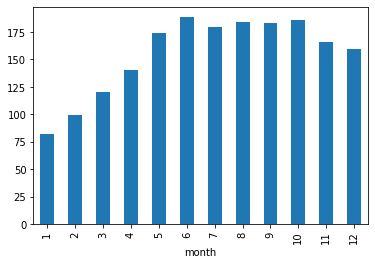

In [8]:
df.groupby("month")["registered"].mean().plot.bar()

### Q5. df객체의 "datetime"변수에서 요일 정보를 뽑아 df객체에 "wday" 변수를 새로 만드시오

In [ ]:
df["wday"] = df["datetime"].dt.weekday
df.head(2)

In [ ]:
pd.to_datetime(pd.Series("2020-10-29")).dt.weekday # 목요일 - 3

### Q6. 주말(토, 일)이 1이고 나머지 요일이 0인 "wend" 변수를 df객체에 만드시오.

In [ ]:
df["wend"] = (df["wday"].isin([5, 6])) + 0
pd.crosstab(df["wday"], df["wend"])

### Q7. 주중과 주말에 따른 "casual" 변수값의 차이가 있는지 독립 2표본 t검정을 사용하여 결과를 확인하시오.

In [17]:
ttest_ind(df.loc[df["wend"] == 0, "casual"],
          df.loc[df["wend"] == 1, "casual"])

Ttest_indResult(statistic=-34.20622323223231, pvalue=1.1588324471094126e-243)

In [ ]:
""